## Working with data

Let's work through an example of a time series of average monthly temperatures for four cities from 1950 to the present. Data can be found at https://www.ncdc.noaa.gov/cag/city/time-series/

To get data for a city, select *Average Temperature*, *All Months*, *Start Year*, *End Year*, *State*, and *City*. Time series for several cities can be combined into a single dataset using Python or Excel.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image, display

datadir = '/content/drive/My Drive/Notebooks/Assignment2/'
imagesdir = '/content/drive/My Drive/Notebooks/Assignment2/images/'

# datadir = '/content/drive/My Drive/Courses/672/Notebooks/data/'
# imagesdir = '/content/drive/My Drive/Courses/672/Notebooks/images/'

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the dataset
filename = datadir + 'cityTempsSeries.csv'
frame = pd.read_csv(filename)
frame

,Date,Cleveland,Miami,NYC,SF
0,195001,35.0,73.6,41.0,44.0
1,195002,27.7,70.5,30.8,49.0
2,195003,31.5,72.2,35.8,50.6
3,195004,41.6,71.4,48.1,54.3
4,195005,59.7,79.5,58.5,55.7
...,...,...,...,...,...
861,202110,61.6,81.2,62.0,62.7
862,202111,41.8,73.1,46.3,58.6
863,202112,40.5,74.5,43.8,50.2
864,202201,23.8,68.7,30.3,52.6


The *date* column has format *yyyymm* and there is one column per city. Temperatures are given in Farenheit.

In [4]:
frame.columns

Index(['Date', 'Cleveland', 'Miami', 'NYC', 'SF'], dtype='object')

What are the attributes?
+ *dates*: ordinal 
+ *cities*: categorical (unordered)
+ *temperature values*: numerical

We can extract the columns by name.

In [5]:
print(frame['Date'])
print(frame.Miami)

0      195001
1      195002
2      195003
3      195004
4      195005
        ...  
861    202110
862    202111
863    202112
864    202201
865    202202
Name: Date, Length: 866, dtype: int64
0      73.6
1      70.5
2      72.2
3      71.4
4      79.5
       ... 
861    81.2
862    73.1
863    74.5
864    68.7
865    73.5
Name: Miami, Length: 866, dtype: float64


Note the *Date* column is of type integer. Let's convert this column to a Python *datetime* object.

In [6]:
frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m')
frame

,Date,Cleveland,Miami,NYC,SF
0,1950-01-01,35.0,73.6,41.0,44.0
1,1950-02-01,27.7,70.5,30.8,49.0
2,1950-03-01,31.5,72.2,35.8,50.6
3,1950-04-01,41.6,71.4,48.1,54.3
4,1950-05-01,59.7,79.5,58.5,55.7
...,...,...,...,...,...
861,2021-10-01,61.6,81.2,62.0,62.7
862,2021-11-01,41.8,73.1,46.3,58.6
863,2021-12-01,40.5,74.5,43.8,50.2
864,2022-01-01,23.8,68.7,30.3,52.6


Let's extract the month and year from the datetime object and add these as new columns. We'll represent the year as an integer and the month as a month name abbreviation.

In [7]:
d = frame['Date'][0]
print(d)
print(d.month)
print(d.year)

1950-01-01 00:00:00
1
1950


In [8]:
# get month name abbreviations
import calendar

for i in range(1, 12):
  print(calendar.month_abbr[i])

Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov


In [9]:
# add new columns to frame
frame['Year'] = frame['Date'].apply(lambda date: date.year)
frame['Month'] = frame['Date'].apply(lambda date: calendar.month_abbr[date.month])
frame

,Date,Cleveland,Miami,NYC,SF,Year,Month
0,1950-01-01,35.0,73.6,41.0,44.0,1950,Jan
1,1950-02-01,27.7,70.5,30.8,49.0,1950,Feb
2,1950-03-01,31.5,72.2,35.8,50.6,1950,Mar
3,1950-04-01,41.6,71.4,48.1,54.3,1950,Apr
4,1950-05-01,59.7,79.5,58.5,55.7,1950,May
...,...,...,...,...,...,...,...
861,2021-10-01,61.6,81.2,62.0,62.7,2021,Oct
862,2021-11-01,41.8,73.1,46.3,58.6,2021,Nov
863,2021-12-01,40.5,74.5,43.8,50.2,2021,Dec
864,2022-01-01,23.8,68.7,30.3,52.6,2022,Jan


Let's reorder the columns and drop the *Date* column.

In [10]:
cols = list(frame.columns)
cols

['Date', 'Cleveland', 'Miami', 'NYC', 'SF', 'Year', 'Month']

In [11]:
newcols = cols[-2:] + cols[1:-2]
newcols

['Year', 'Month', 'Cleveland', 'Miami', 'NYC', 'SF']

In [12]:
frame = frame[newcols]
frame

,Year,Month,Cleveland,Miami,NYC,SF
0,1950,Jan,35.0,73.6,41.0,44.0
1,1950,Feb,27.7,70.5,30.8,49.0
2,1950,Mar,31.5,72.2,35.8,50.6
3,1950,Apr,41.6,71.4,48.1,54.3
4,1950,May,59.7,79.5,58.5,55.7
...,...,...,...,...,...,...
861,2021,Oct,61.6,81.2,62.0,62.7
862,2021,Nov,41.8,73.1,46.3,58.6
863,2021,Dec,40.5,74.5,43.8,50.2
864,2022,Jan,23.8,68.7,30.3,52.6


What are the attributes?
+ *Year*: ordinal 
+ *Month*: ordinal
+ *cities*: categorical (unordered)
+ *temperature values*: numerical



### Exercise 1
Go to https://www.ncdc.noaa.gov/cag/city/time-series/ and retrieve time-series temperature data for four to six cities of your choice. To get data for a city, select *Average Temperature*, *All Months*, *Start Year*, *End Year*, *State*, and *City*. 

Use Excel to combine these datasets into a single file *cityTempsSeries.csv* with temperature data for your cities. This has the same format as the file read at the top of this notebook, but it has data for your chosen cities.

Then use the techniques used in this notebook above to create a dataframe with the format given above.


In [13]:
fresno = pd.read_csv(datadir + 'cities/fresno.csv')
tampa = pd.read_csv(datadir + 'cities/tampa.csv')
omaha = pd.read_csv(datadir + 'cities/omaha.csv')
jacksonville = pd.read_csv(datadir + 'cities/jacksonville.csv')

result = pd.concat([fresno, tampa,omaha, jacksonville], axis=1)

df= pd.concat([result['Date'],result['Fresno'],result['Omaha'],result['Tampa'],result['Jacksonville']],axis=1)
df

,Date,Fresno,Omaha,Tampa,Jacksonville
0,195001,44.0,18.0,70.1,63.4
1,195002,52.8,25.0,66.2,58.9
2,195003,54.6,33.6,67.1,59.2
3,195004,64.2,46.0,68.9,62.8
4,195005,69.7,61.3,79.9,75.9
...,...,...,...,...,...
851,202012,48.9,29.8,61.2,53.3
852,202101,50.4,28.7,61.7,54.9
853,202102,54.1,16.5,67.3,59.2
854,202103,56.3,46.1,70.9,64.9


In [14]:
import calendar

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
d = df['Date'][0]

df['Year'] = df['Date'].apply(lambda date: date.year)
df['Month'] = df['Date'].apply(lambda date: calendar.month_abbr[date.month])
df

,Date,Fresno,Omaha,Tampa,Jacksonville,Year,Month
0,1950-01-01,44.0,18.0,70.1,63.4,1950,Jan
1,1950-02-01,52.8,25.0,66.2,58.9,1950,Feb
2,1950-03-01,54.6,33.6,67.1,59.2,1950,Mar
3,1950-04-01,64.2,46.0,68.9,62.8,1950,Apr
4,1950-05-01,69.7,61.3,79.9,75.9,1950,May
...,...,...,...,...,...,...,...
851,2020-12-01,48.9,29.8,61.2,53.3,2020,Dec
852,2021-01-01,50.4,28.7,61.7,54.9,2021,Jan
853,2021-02-01,54.1,16.5,67.3,59.2,2021,Feb
854,2021-03-01,56.3,46.1,70.9,64.9,2021,Mar


In [15]:
cols = list(df.columns)
newcols = cols[-2:] + cols[1:-2]

df = df[newcols]
df

,Year,Month,Fresno,Omaha,Tampa,Jacksonville
0,1950,Jan,44.0,18.0,70.1,63.4
1,1950,Feb,52.8,25.0,66.2,58.9
2,1950,Mar,54.6,33.6,67.1,59.2
3,1950,Apr,64.2,46.0,68.9,62.8
4,1950,May,69.7,61.3,79.9,75.9
...,...,...,...,...,...,...
851,2020,Dec,48.9,29.8,61.2,53.3
852,2021,Jan,50.4,28.7,61.7,54.9
853,2021,Feb,54.1,16.5,67.3,59.2
854,2021,Mar,56.3,46.1,70.9,64.9


### Exercise 2
Let's make a line graph of months by temperature for a given year across all cities. Since months are ordinal, it makes sense to connect successive datapoints with lines.

['Cleveland', 'Miami', 'NYC', 'SF']
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


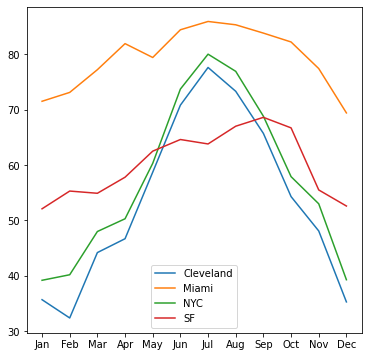

In [16]:
cities = list(frame.columns[2:])
print(cities)
months = calendar.month_abbr[1:13]
print(months)
year = 2020
# extract subframe of interest
f = frame[frame.Year == year]
plt.figure(figsize=(6, 6))
for city in cities:
  plt.plot(months, f[city], label=city)
plt.legend(loc='best');

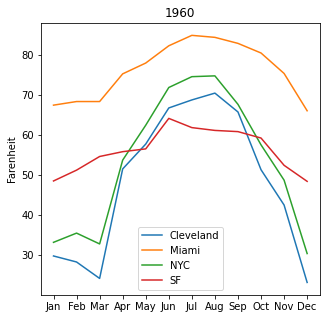

In [17]:
# bundle the above code as a function
def plot_one_year(frame, year, cmap=None, **kwargs):
  cities = list(frame.columns[2:])
  n = len(cities)
  months = calendar.month_abbr[1:13]
  f = frame[frame.Year == year]
  plt.figure(**kwargs)
  for i, city in enumerate(cities):
    c = cmap(i/(n-1)) if cmap else None
    plt.plot(months, f[city], c=c, label=city)
  plt.legend(loc='best');
  plt.title(str(year))
  plt.ylabel('Farenheit')

plot_one_year(frame, 1960, figsize=(5,5))

For this exercise, define the function 

    plot_one_month(frame, month, cmap=None, **kwargs) 
    
that draws a line graph over all years for given *month*. Assume *frame* has the format defined in this notebook and used in the previous function.

The following image results from the function call:

    plot_one_month(frame, 'Jan')

In [18]:
df= frame
df.drop_duplicates(subset=['Year'])
print(df)

     Year Month  Cleveland  Miami   NYC    SF
0    1950   Jan       35.0   73.6  41.0  44.0
1    1950   Feb       27.7   70.5  30.8  49.0
2    1950   Mar       31.5   72.2  35.8  50.6
3    1950   Apr       41.6   71.4  48.1  54.3
4    1950   May       59.7   79.5  58.5  55.7
..    ...   ...        ...    ...   ...   ...
861  2021   Oct       61.6   81.2  62.0  62.7
862  2021   Nov       41.8   73.1  46.3  58.6
863  2021   Dec       40.5   74.5  43.8  50.2
864  2022   Jan       23.8   68.7  30.3  52.6
865  2022   Feb       30.5   73.5  37.3  54.6

[866 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:2136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


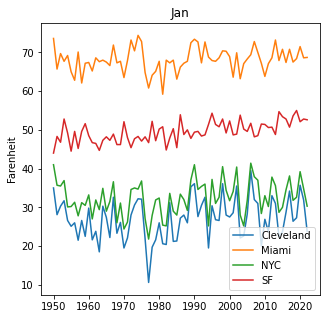

In [39]:
def plot_one_month(frame, month, cmap=None, **kwargs):
  cities = list(frame.columns[2:])
  
  years = frame["Year"]
  years.drop_duplicates(inplace = True)
  f = frame[frame.Month == month]
  plt.figure(**kwargs)
  for i, city in enumerate(cities):
    plt.plot(years, f[city], label=city)
  plt.legend(loc='best');
  plt.title(str(month))
  plt.ylabel('Farenheit')

plot_one_month(frame, 'Jan', figsize=(5,5))

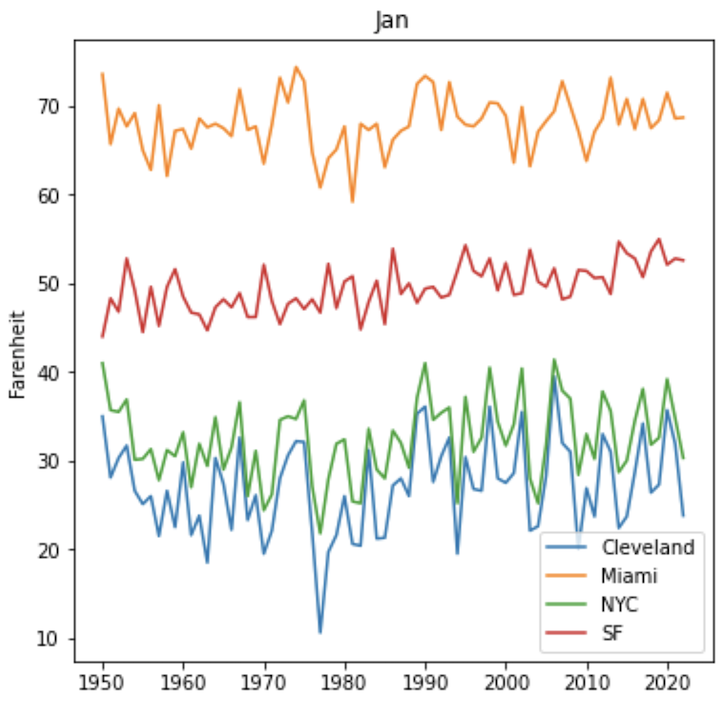

In [20]:
display_images(['ass2TempsA.png'])

### Exercise 3
We can use a bar graph to show the temperature for a given month and year for each city.

Year         2000
Month         Jun
Cleveland    69.5
Miami        82.4
NYC          71.8
SF           62.8
Name: 605, dtype: object

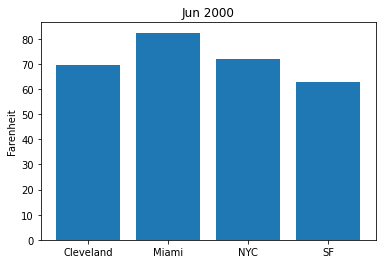

In [35]:
def barplot_year_month(frame, year, month, **kwargs):
  cities = list(frame.columns[2:])
  plt.figure(**kwargs)
  # rcd is the row indexed by year and month
  rcd = frame.loc[((frame.Year == year) & (frame.Month == month)), :].iloc[0]

  plt.bar(cities,rcd[2:].values)
  plt.title(month + ' ' + str(year))
  plt.ylabel('Farenheit')
  

barplot_year_month(frame, 2000, 'Jun')
rcd = frame.loc[((frame.Year == 2000) & (frame.Month == 'Jun')), :].iloc[0]
rcd

For this excercise, write a version of function `barplot_year_month` that generates a bar graph whose bars are ordered by descending height (from warmest to coldest temperature.

    barplot_year_month(frame, 2000, 'Jan')

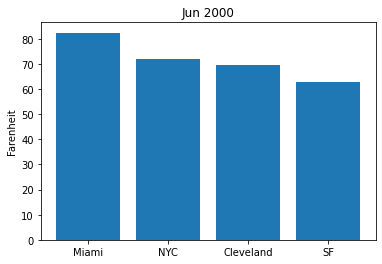

In [37]:
def barplot_year_month(frame, year, month, **kwargs):
  cities = list(frame.columns[2:])
  
  plt.figure(**kwargs)
  rcd = frame.loc[((frame.Year == year) & (frame.Month == month)), :].iloc[0]
  city = rcd[2:]
  
  result = city.argsort()
  x = city[result].iloc[::-1].index
  y = city[result].iloc[::-1].values
 
  plt.bar(x,y)

  plt.title(month + ' ' + str(year))
  plt.ylabel('Farenheit')
  
barplot_year_month(frame, 2000, 'Jun')

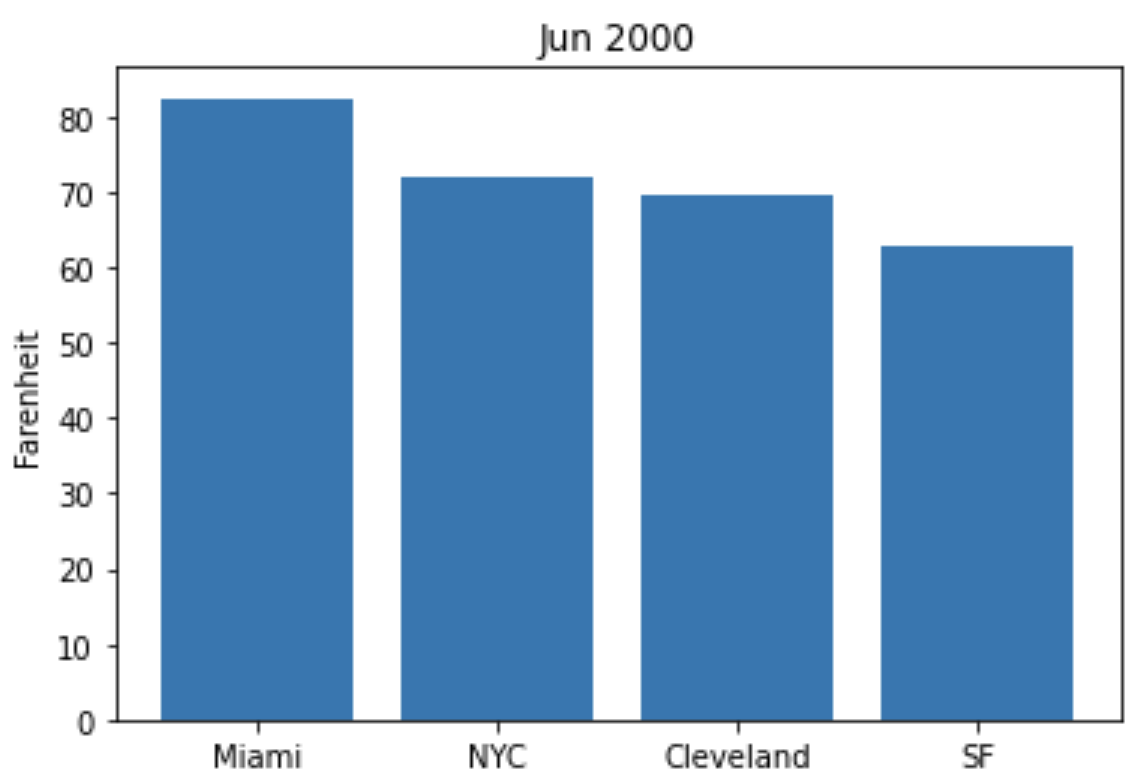

In [23]:
display_images(['ass2TempsB.png'])

### Exercise 4
Since the cities are unordered categorical data, we can show their temperatures using a dot plot. Each city's temperature values are depicted by a column of dots arranged along the vertical temperature axis. 

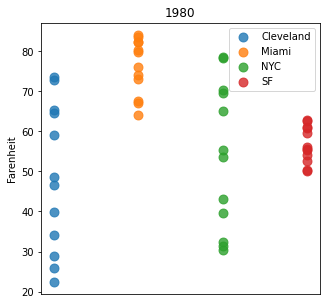

In [24]:
def dotplot_one_year(frame, year, cmap=None, **kwargs):
  cities = list(frame.columns[2:])
  n = len(cities)
  months = calendar.month_abbr[1:13]
  f = frame[frame.Year == year]
  plt.figure(**kwargs)
  for i, city in enumerate(cities):
    c = None
    if cmap:
      c = cmap(i/(n-1))
      c = [c] * 12
    plt.scatter([i]*12, f[city], label=city, c=c, s=80, alpha=0.8)
  plt.xticks([])
  plt.legend(loc='best');
  plt.title(str(year))
  plt.ylabel('Farenheit')

dotplot_one_year(frame, 1980, figsize=(5,5))

Write the function

    dotplot_one_month(frame, month, cmap, **kwargs)

that draws a dot plot over all years for a given month. I've written mine (pictured below) so that the dot opacity (alpha) varies from 0.1 to 0.5 as the years increase from the earliest year to the latest year.

    dotplot_one_month(frame, 'Jun', figsize=(4,6))

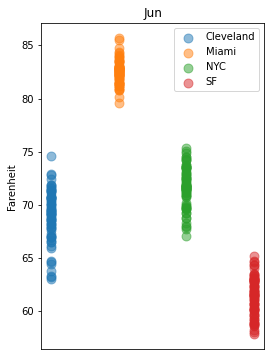

In [26]:
def dotplot_one_month(frame, month, cmap=None, **kwargs):
  cities = list(frame.columns[2:])
  n = len(cities)
  months = calendar.month_abbr[1:13]
  f = frame[frame.Month == month]
  arr = np.array([np.full(len(f),0),np.full(len(f),1),np.full(len(f),2),np.full(len(f),3)])
  df = pd.DataFrame(arr)

  plt.figure(**kwargs)
  for i, city in enumerate(cities):
    plt.scatter(df.T[i], f[city], label=city, s=80, alpha=0.5)
  plt.xticks([])
  plt.legend(loc='best');
  plt.title(str(month))
  plt.ylabel('Farenheit')

dotplot_one_month(frame, 'Jun', figsize=(4,6))

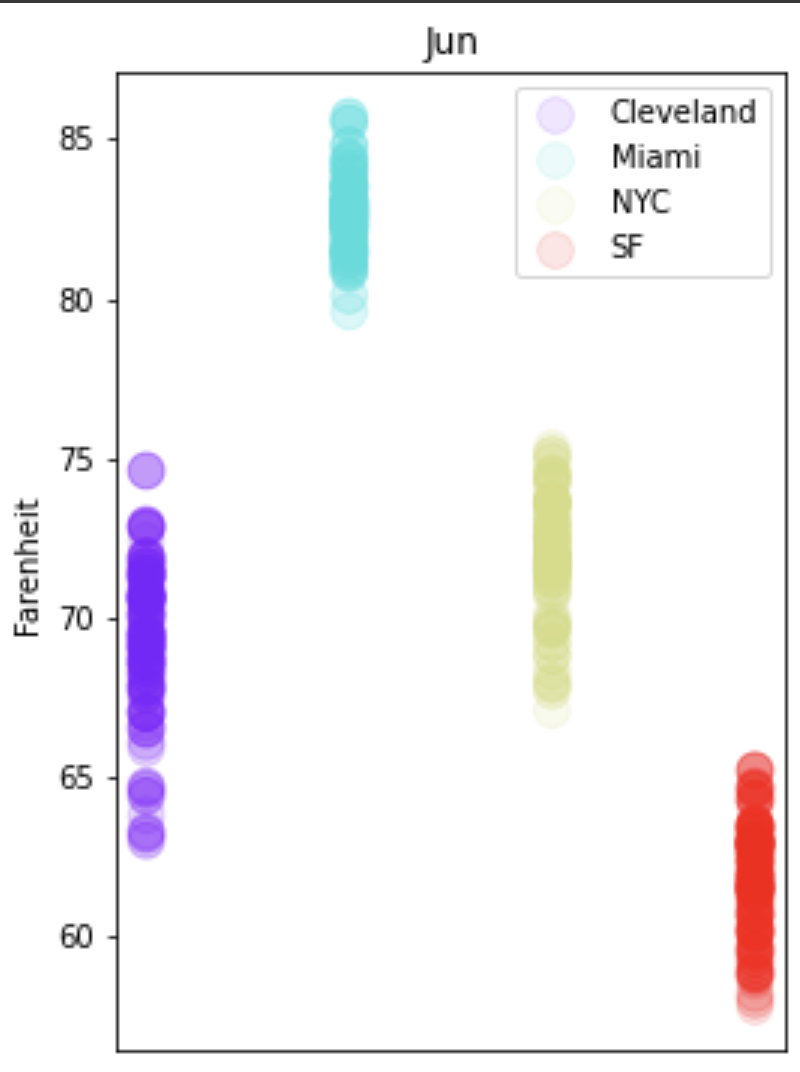

In [27]:
display_images(['ass2TempsC.png'])

### Exercise 5
We can also use a scatterplot to show variation in temperature in a given month over the range of years.

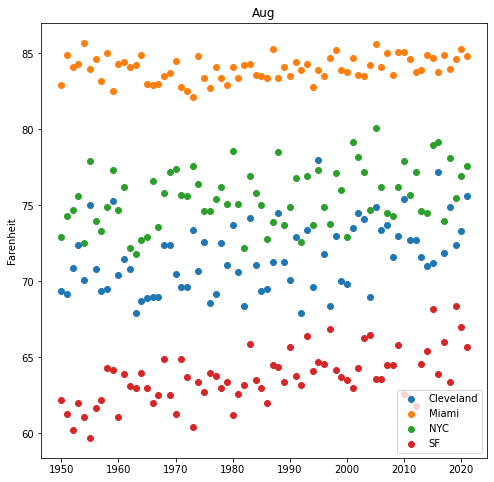

In [28]:
def scatterplot_one_month(frame, month, cmap=None, **kwargs):
  cities = list(frame.columns[2:])
  n = len(cities)
  f = frame[frame.Month == month]
  nyears = len(f)
  plt.figure(**kwargs)
  for i, city in enumerate(cities):
    c = None
    if cmap:
      c = cmap(i/(n-1))
      c = [c] * nyears
    plt.scatter(f.Year, f[city], c=c, label=city)
  plt.legend(loc='best');
  plt.title(str(month))
  plt.ylabel('Farenheit')

scatterplot_one_month(frame, 'Aug', figsize=(8,8))

For this exercise, draw best-fit lines through the scatterplot for each city. To compute the slope *m* and *y* intersect for a set of points with $x$ and $y$ coordinates:

    m, b = np.polyfit(xs, ys, 1)

Once you have *m* and *b*, you can draw a line from *(x1, m*x1+b)* to *(x2, m*x2+b)* where *x1* and *x2* are the first and last years respectively.

The following figure was produced by this call:

    scatterplot_one_month(frame, 'Aug')

In [29]:
def trend_one_month(frame, month):
  f = frame[frame.Month == month]
  x1=1950
  x2=2022
  m1, b1 = np.polyfit(f.Year, f.Miami, 1)
  m2, b2 = np.polyfit(f.Year, f.Cleveland, 1)
  m3, b3 = np.polyfit(f.Year, f.NYC, 1)
  m4, b4 = np.polyfit(f.Year, f.SF, 1)
  
  y_Miami = np.array(f.Year*m1+b1)
  y_Cleveland = np.array(f.Year*m2+b2)
  y_NYC = np.array(f.Year*m3+b3)
  y_SF = np.array(f.Year*m4+b4)

  plt.plot(f.Year,y_Miami, 'orange',ms=50)
  plt.plot(f.Year,y_Cleveland, 'b')
  plt.plot(f.Year,y_NYC, 'g')
  plt.plot(f.Year,y_SF, 'r')

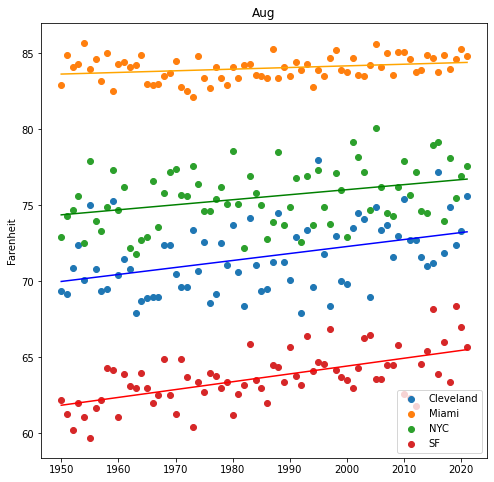

In [30]:
scatterplot_one_month(frame, 'Aug', figsize=(8,8))
trend_one_month(frame, 'Aug')

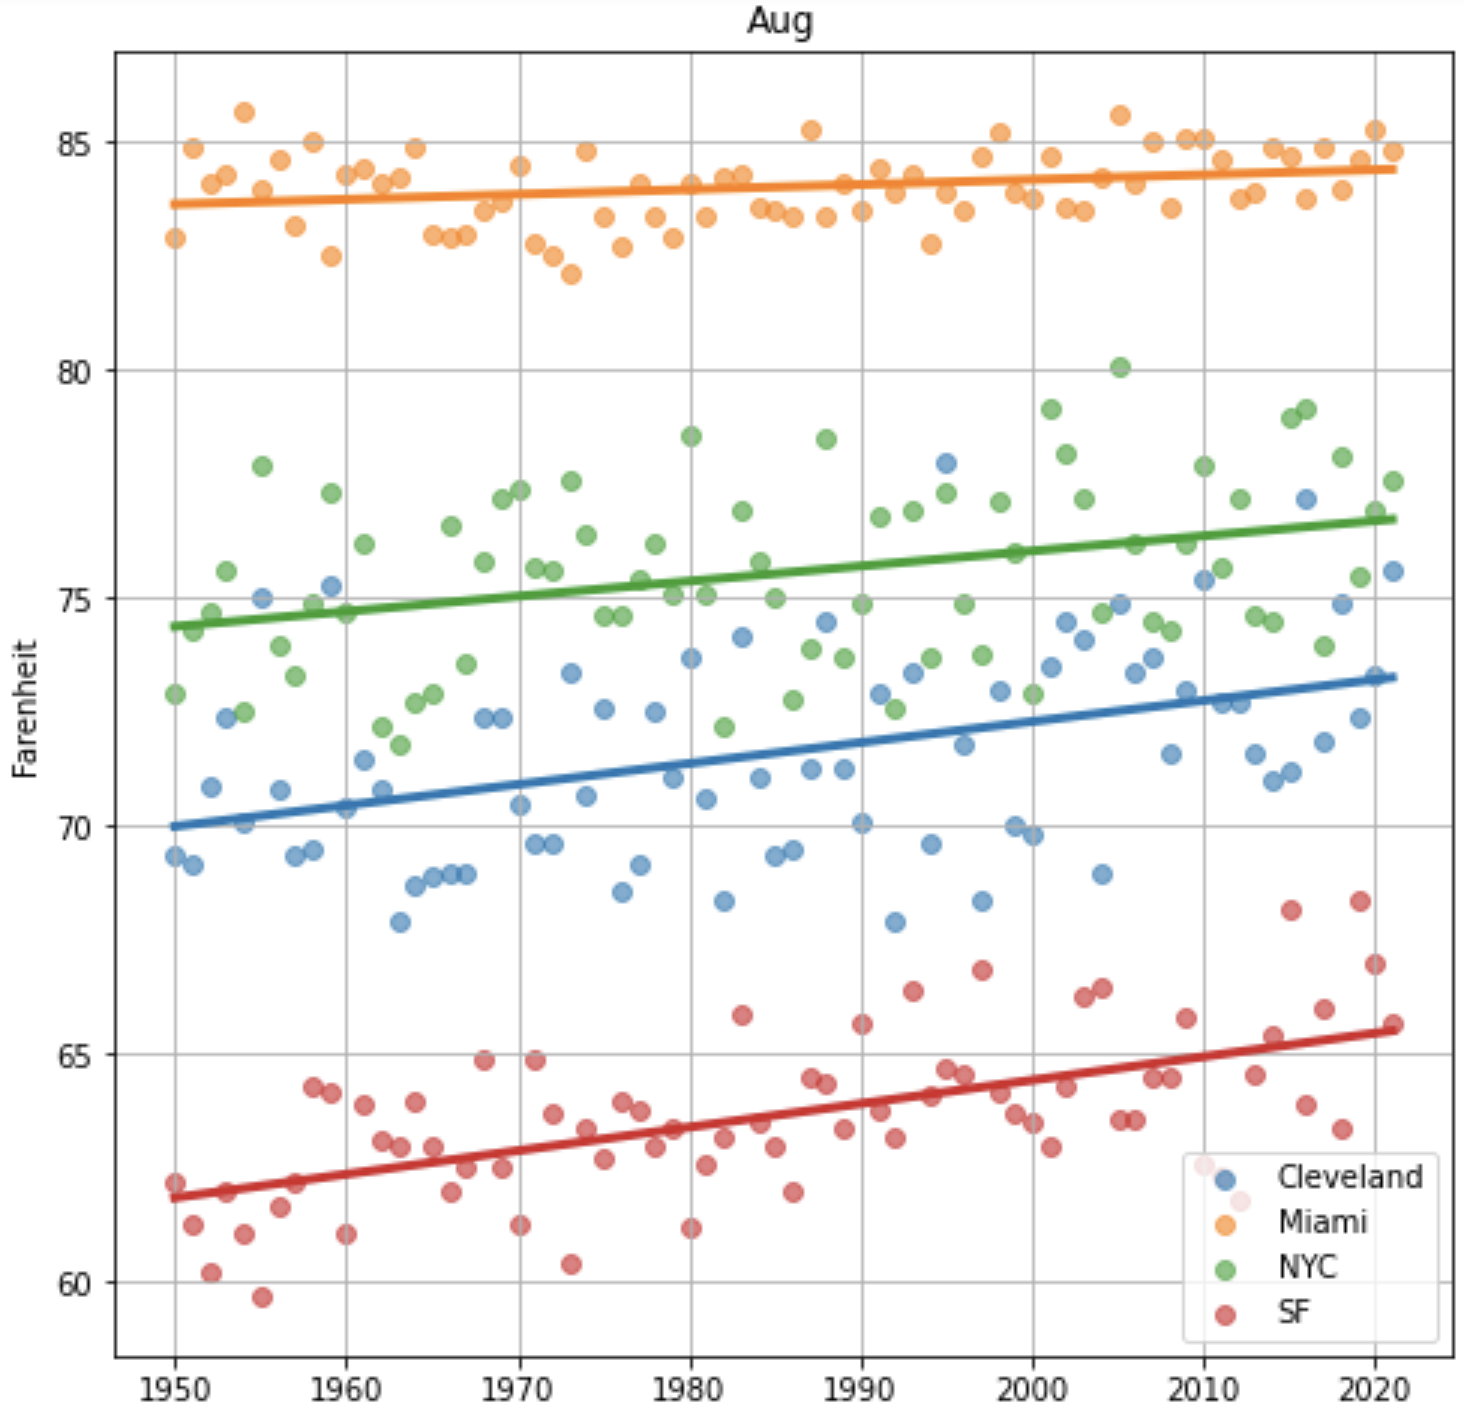

In [31]:
display_images(['ass2TempsD.png'])